In [1]:
%cd /content/drive/MyDrive/L2D-main

/content/drive/MyDrive/L2D-main


In [3]:
import numpy as np
from uniform_instance_gen import uni_instance_gen

j = 17
m = 12
l = 1
h = 99
batch_size = 100
seed = 150

np.random.seed(seed)

data = np.array([uni_instance_gen(n_j=j, n_m=m, low=l, high=h) for _ in range(batch_size)])
print(data.shape)
np.save('./DataGen/generatedData{}_{}_Seed{}.npy'.format(j, m, seed), data)


(100, 2, 17, 12)


In [13]:
!python3 PPO_jssp_multiInstances.py --n_j=17 --n_m=12 --max_updates=50 --num_envs=2

/content/drive/MyDrive/L2D-main/mb_agg.py:44: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:605.)
  graph_pool = torch.sparse.FloatTensor(idx, elem,
Episode 1	 Last reward: -1577.50	 Mean_Vloss: 2.21842098
Episode 2	 Last reward: -1531.50	 Mean_Vloss: 2.18772840
Episode 3	 Last reward: -1460.00	 Mean_Vloss: 2.17262220
Episode 4	 Last reward: -1539.50	 Mean_Vloss: 2.16915774
Episode 5	 Last reward: -1634.00	 Mean_Vloss: 2.18081069
Episode 6	 Last reward: -1658.00	 Mean_Vloss: 2.12601805
Episode 7	 Last reward: -1510.00	 Mean_Vloss: 2.14316654
Episode 8	 Last reward: -1555.50	 Mean_Vloss: 2.11526370
Episode 9	 Last reward: -1715.00	 Mean_Vloss: 2.12047148
Episode 10	 Last reward: -1542.00	 Mean_Vloss: 2.07081842
Episode 11	 Last reward: -1606.50	 Mean_Vloss: 2.08272648
Episode 12	 Last reward: -1499.50	 Mean_

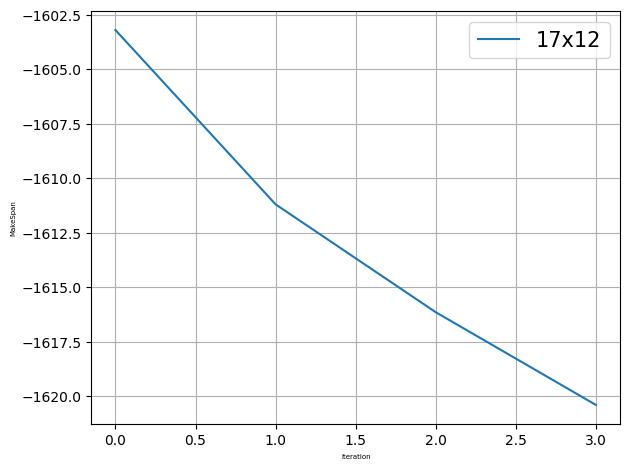

In [19]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
import re

# plot parameters
x_label_scale = 5
y_label_scale = 5
anchor_text_size = 15
show = True
save = False
save_file_type = '.pdf'
# problem params
n_j = 17
n_m = 12
l = 1
h = 99
stride = 50
datatype = 'log'  # 'vali', 'log'


f = open('./{}_{}_{}_{}_{}.txt'.format(datatype, n_j, n_m, l, h), 'r').readline()
if datatype == 'vali':
    obj = numpy.array([float(s) for s in re.findall(r'-?\d+\.?\d*', f)[1::2]])[:]
    idx = np.arange(obj.shape[0])
    # plotting...
    plt.xlabel('Iteration', {'size': x_label_scale})
    plt.ylabel('MakeSpan', {'size': y_label_scale})
    plt.grid()
    plt.plot(idx, obj, color='tab:blue', label='{}x{}'.format(n_j, n_m))
    plt.tight_layout()
    plt.legend(fontsize=anchor_text_size)
    if save:
        plt.savefig('./{}{}'.format('message-passing_time', save_file_type))
    if show:
        plt.show()
elif datatype == 'log':
    obj = numpy.array([float(s) for s in re.findall(r'-?\d+\.?\d*', f)[1::2]])[:].reshape(-1, stride).mean(axis=-1)
    idx = np.arange(obj.shape[0])
    # plotting...
    plt.xlabel('Iteration', {'size': x_label_scale})
    plt.ylabel('MakeSpan', {'size': y_label_scale})
    plt.grid()
    plt.plot(idx, obj, color='tab:blue', label='{}x{}'.format(n_j, n_m))
    plt.tight_layout()
    plt.legend(fontsize=anchor_text_size)
    if save:
        plt.savefig('./{}{}'.format('message-passing_time', save_file_type))
    if show:
        plt.show()
else:
    print('Wrong datatype.')




In [4]:
!python3 test_learned_on_benchmark.py

/content/drive/My Drive/L2D-main/mb_agg.py:44: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:605.)
  graph_pool = torch.sparse.FloatTensor(idx, elem,
Instance1 makespan: 2788.0
Instance2 makespan: 2731.0
Instance3 makespan: 2939.0
Instance4 makespan: 2735.0
Instance5 makespan: 2940.0
Instance6 makespan: 2875.0
Instance7 makespan: 2854.0
Instance8 makespan: 2936.0
Instance9 makespan: 2840.0
Instance10 makespan: 2690.0
